In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # For visualization of data relations
import seaborn as sns #Advanced Visualization Library Build on top of MatplotLib
import warnings as wn

wn.filterwarnings("ignore", category=FutureWarning)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pet-da/pet_supplies_2212.csv
/kaggle/input/tableaugraph1/Tableau.png


# Author: Moin khan
* Please refer to the comments for a better understanding of the workflow, including the operations performed and their purpose.
* Solutions to the questions are provided as markdown or comments under the respective solution headings.

In [2]:
#Reading the Dataset File
df=pd.read_csv('../input/pet-da/pet_supplies_2212.csv')
df.head(20) #head function allows us to display the desired number of rows from the Begining of Index, tail() is vice versa.

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1
5,6,Housing,Dog,Small,30.77,874.58,7.0,0
6,7,Housing,Dog,Small,31.04,875.07,5.0,0
7,8,Toys,Cat,medium,28.9,1074.31,4.0,0
8,9,Equipment,Fish,MEDIUM,17.82,503.67,5.0,0
9,10,Medicine,Dog,medium,24.93,838.88,8.0,0


# Handling Missing Values

In [3]:
#Looking out for any NaN values
df['size']=df['size'].str.lower() #inconsistent cases of size strings converting all of them to lowercase for more beautiful view
null_counts = df.isnull().sum() # Count of NaN values per column
print("Number of NaN values per column:")
print(null_counts)

Number of NaN values per column:
product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64


In [15]:
# we have ratings data as NaN, we will replace the Na values with 0 as per the instructions
df['rating']=df['rating'].fillna(0)
print('\n NaN Ratings replaced with 0: \n')
df.head(30)


 NaN Ratings replaced with 0: 



,product_id,category,animal,size,price,sales,rating,repeat_purchase,purchase_type
0,1,Food,Bird,large,51.1,1860.62,7.0,1,Repeat
1,2,Housing,Bird,medium,35.98,963.60,6.0,0,Non-repeat
2,3,Food,Dog,medium,31.23,898.30,5.0,1,Repeat
3,4,Medicine,Cat,small,24.95,982.15,6.0,1,Repeat
4,5,Housing,Cat,small,26.18,832.63,7.0,1,Repeat
5,6,Housing,Dog,small,30.77,874.58,7.0,0,Non-repeat
6,7,Housing,Dog,small,31.04,875.07,5.0,0,Non-repeat
7,8,Toys,Cat,medium,28.9,1074.31,4.0,0,Non-repeat
8,9,Equipment,Fish,medium,17.82,503.67,5.0,0,Non-repeat
9,10,Medicine,Dog,medium,24.93,838.88,8.0,0,Non-repeat


In [16]:
#we also have some Price values as Unlisted, we have to replace them with overall median price
#First we need to make the Price column to numeric and then fill it with Na then replace them with median values
median_price = pd.to_numeric(df['price'], errors='coerce').median()

# Replace 'unlisted' strings with NaN, and then fill NaN values with the median price
df['price'] = df['price'].replace('unlisted', np.nan)
df['price'] = df['price'].fillna(median_price).round(2) #rounding to 2 decimal places

print("\nDataFrame with 'unlisted' replaced by median in 'price' column: \n")
df.head(20)


DataFrame with 'unlisted' replaced by median in 'price' column: 



,product_id,category,animal,size,price,sales,rating,repeat_purchase,purchase_type
0,1,Food,Bird,large,51.1,1860.62,7.0,1,Repeat
1,2,Housing,Bird,medium,35.98,963.60,6.0,0,Non-repeat
2,3,Food,Dog,medium,31.23,898.30,5.0,1,Repeat
3,4,Medicine,Cat,small,24.95,982.15,6.0,1,Repeat
4,5,Housing,Cat,small,26.18,832.63,7.0,1,Repeat
5,6,Housing,Dog,small,30.77,874.58,7.0,0,Non-repeat
6,7,Housing,Dog,small,31.04,875.07,5.0,0,Non-repeat
7,8,Toys,Cat,medium,28.9,1074.31,4.0,0,Non-repeat
8,9,Equipment,Fish,medium,17.82,503.67,5.0,0,Non-repeat
9,10,Medicine,Dog,medium,24.93,838.88,8.0,0,Non-repeat


In [17]:
# The category column has missing values marked as '-' replacing them with 'Unknown' as per Instructions
df['category']=df['category'].replace('-','Unknown')
print('\n Category with - data replaced with Unknown: \n')
df.head(20)


 Category with - data replaced with Unknown: 



,product_id,category,animal,size,price,sales,rating,repeat_purchase,purchase_type
0,1,Food,Bird,large,51.1,1860.62,7.0,1,Repeat
1,2,Housing,Bird,medium,35.98,963.60,6.0,0,Non-repeat
2,3,Food,Dog,medium,31.23,898.30,5.0,1,Repeat
3,4,Medicine,Cat,small,24.95,982.15,6.0,1,Repeat
4,5,Housing,Cat,small,26.18,832.63,7.0,1,Repeat
5,6,Housing,Dog,small,30.77,874.58,7.0,0,Non-repeat
6,7,Housing,Dog,small,31.04,875.07,5.0,0,Non-repeat
7,8,Toys,Cat,medium,28.9,1074.31,4.0,0,Non-repeat
8,9,Equipment,Fish,medium,17.82,503.67,5.0,0,Non-repeat
9,10,Medicine,Dog,medium,24.93,838.88,8.0,0,Non-repeat


In [18]:
#handling repeat_purchase nan or random values other than 0 and 1
df = df[df['repeat_purchase'].notna() & df['repeat_purchase'].isin([0, 1])]
#isin() method is a boolean which return either flase or true
print("\n New Data: \n")
df.head(20)

#the above operation will remove the data of row having repeat_purchase value other than 0 or 1


 New Data: 



,product_id,category,animal,size,price,sales,rating,repeat_purchase,purchase_type
0,1,Food,Bird,large,51.1,1860.62,7.0,1,Repeat
1,2,Housing,Bird,medium,35.98,963.60,6.0,0,Non-repeat
2,3,Food,Dog,medium,31.23,898.30,5.0,1,Repeat
3,4,Medicine,Cat,small,24.95,982.15,6.0,1,Repeat
4,5,Housing,Cat,small,26.18,832.63,7.0,1,Repeat
5,6,Housing,Dog,small,30.77,874.58,7.0,0,Non-repeat
6,7,Housing,Dog,small,31.04,875.07,5.0,0,Non-repeat
7,8,Toys,Cat,medium,28.9,1074.31,4.0,0,Non-repeat
8,9,Equipment,Fish,medium,17.82,503.67,5.0,0,Non-repeat
9,10,Medicine,Dog,medium,24.93,838.88,8.0,0,Non-repeat


In [24]:
#Checking more NaN Values
null_counts = df.isnull().sum()
print("Number of NaN values per column:")
print(null_counts)

Number of NaN values per column:
product_id         0
category           0
animal             0
size               0
price              0
sales              0
rating             0
repeat_purchase    0
dtype: int64


# Solutions

# Q1: For every column in the data:

In [ ]:
'''
a. State whether the values match the description given in the table above.

The above column data matches the description/criteria except for the Price, Category, and Ratings columns.
These three columns contain missing/NaN values.

b. State the number of missing values in the column.
Number of missing values in each column:

Ratings: 150 'NaN' values (calculated using null_counts = df.isnull().sum())
Category: 25 '-' counts (calculated using unlisted_count = (df['category'] == '-').sum())
Price: 150 'Unlisted' counts (calculated using unlisted_count = (df['price'] == 'unlisted').sum())

c. Describe what you did to make the values match the description if they did not match.
To handle the missing values, the following steps were performed:

Ratings:
Missing values were replaced with 0 using the fillna() function (df['rating'].fillna(0)).

Price:
Missing or unlisted values were replaced with the overall median. Steps:

Converted the Price column to a numeric format.

Replaced all 'unlisted' values with NaN using pd.to_numeric() and numpy.nan in combination with the replace() method.

Filled the resulting NaN values with the median value using the median() function.

Category:
Missing values ('-') were replaced with 'Unknown' using the replace() method (df['category'].replace('-', 'Unknown')).

These steps helped align the dataset values with the provided description.

Note: While the above methods are effective, using the interpolate() method is often more accurate and efficient for
certain types of analysis. For example:

df['rating'] = df.groupby('animal')['rating'].apply(lambda group: group.interpolate()).reset_index(drop=True)

'''

# Q2:  Create a visualization that shows how many products are repeat purchases

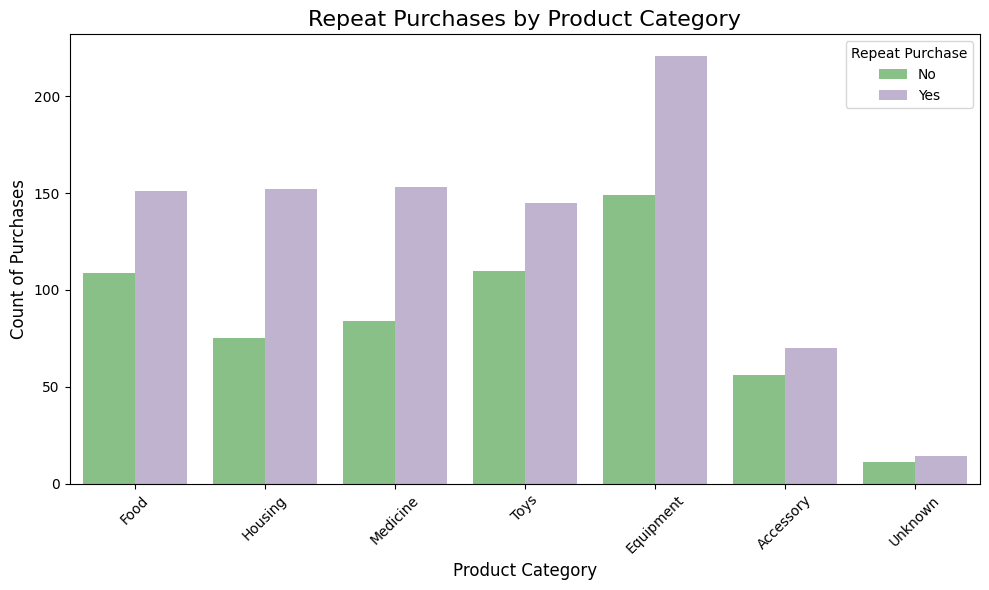

In [9]:

plt.figure(figsize=(10, 6))
cnp=sns.countplot(data=df, x='category', hue='repeat_purchase', palette='Accent') 
#count plot is best for visualizing categorial values
#count plot automatically aplly .groupby method on categorial values

handles, labels = cnp.get_legend_handles_labels()
# Map the original '0' and '1' to 'No' and 'Yes'
labels = ['No' if label == '0' else 'Yes' for label in labels]
cnp.legend(handles, labels, title='Repeat Purchase')
# Add labels and title
plt.title('Repeat Purchases by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Count of Purchases', fontsize=12)


# Show the plot
plt.xticks(rotation=45) #styling category names i.e 45 degrees tilt along x axis
plt.tight_layout()
plt.show()

In [ ]:
'''
Q2 Solutins: 

a. State which category of the variable repeat purchases has the most observations.

From the visualization, we can conclude that among all six product categories, the highest repeat
purchases are for the product category Equipment.

b. Explain whether the observations are balanced across categories of the variable repeat purchases.

From the visualization, we can conclude that the repeat_purchase values are imbalanced across
categories.Specifically, the frequency of non-repeated purchases is lower than that of repeat
purchases,indicating an imbalance.

'''

# Q3: Describe the distribution of all of the sales. Your answer must include a visualization that shows the distribution.

count    1500.000000
mean      996.597847
std       323.952676
min       286.940000
25%       747.420000
50%      1000.830000
75%      1158.157500
max      2255.960000
Name: sales, dtype: float64


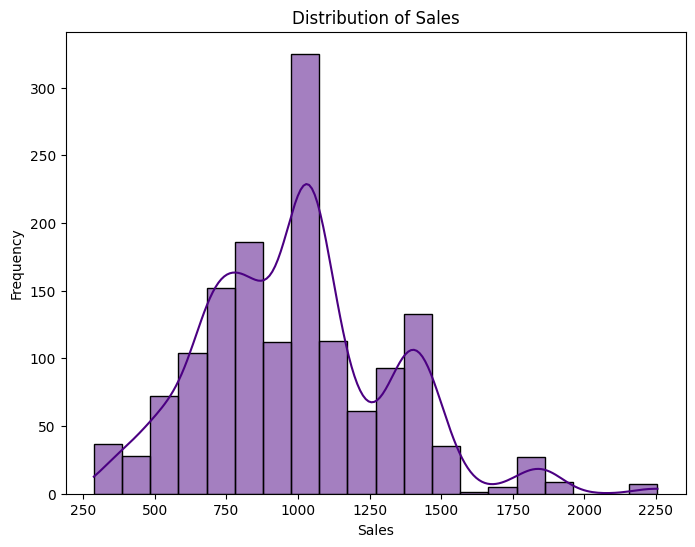

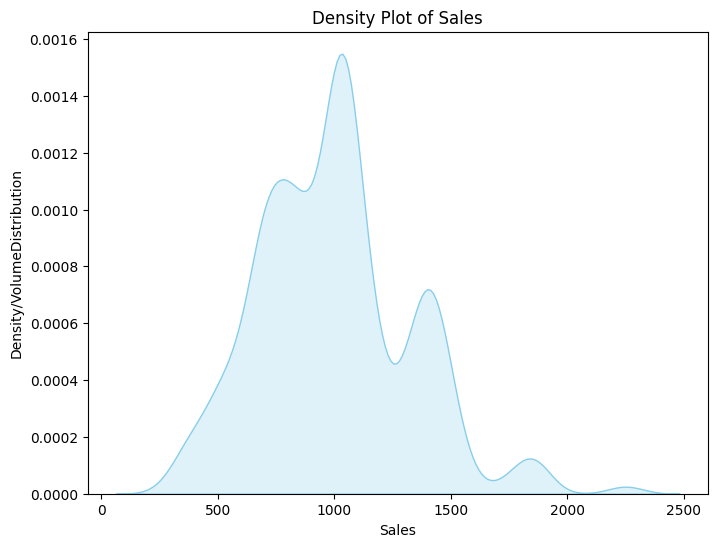

In [10]:

# Calculate summary statistics
sales_stat = df['sales'].describe() #used describe method to analyze statics distribution of sales data 

print(sales_stat) #printing to understand the raw distribution of sales data

# Visualizing the distribution with a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['sales'], kde=True, bins=20, color='indigo') #kernel density esitimate | kde
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Density plot for a smoother distribution view //alternate plot to better understand the spread of sales
plt.figure(figsize=(8, 6))
sns.kdeplot(df['sales'], shade=True, color='skyblue')
plt.title('Density Plot of Sales')
plt.xlabel('Sales')
plt.ylabel('Density/VolumeDistribution')
plt.show()

 ***Verdict for Q-3:*** ***From the above visualization, we can conclude that at a mean revenue of 1000, the sales distribution is highest among all six product categories.***

# Q4: Describe the relationship between repeat purchases and sales. Your answer must include a visualization to demonstrate the relationship.

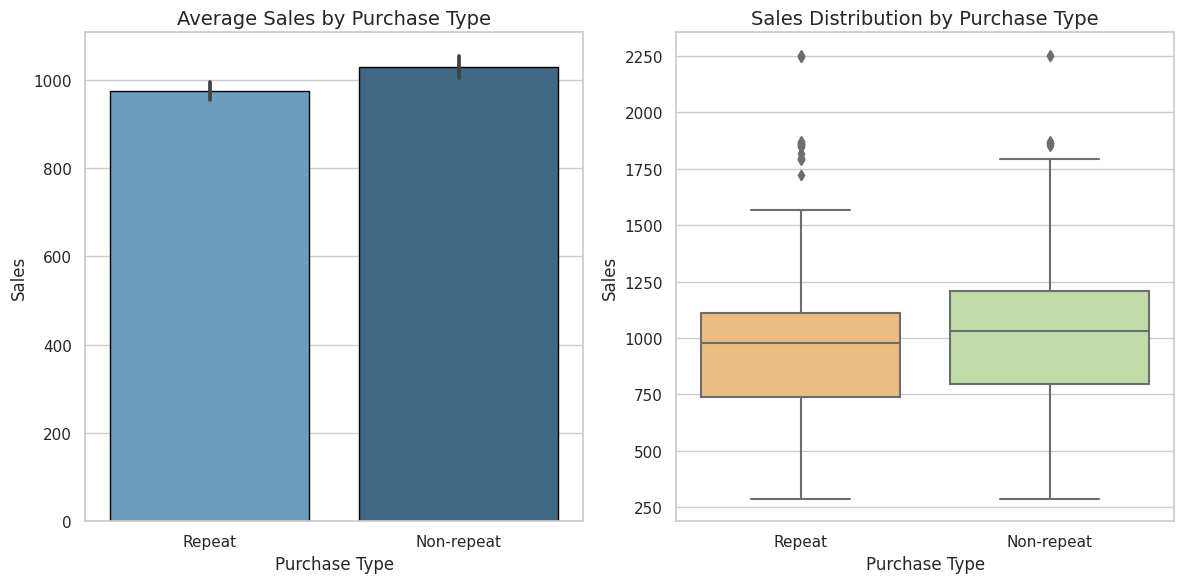

In [13]:

df['purchase_type'] = df['repeat_purchase'].map({1: 'Repeat', 0: 'Non-repeat'}) #creating new column with custom Names for 1,0 

sns.set(style="whitegrid") #styling the seaborn plot area as grid having white bg

plt.figure(figsize=(12, 6))

# Bar Plot: Compare sales revenue for repeat vs non-repeat purchases
plt.subplot(1, 2, 1)
sns.barplot(x="purchase_type", y="sales", data=df, palette="Blues_d", edgecolor="black")
plt.title("Average Sales by Purchase Type", fontsize=14)
plt.xlabel("Purchase Type", fontsize=12)
plt.ylabel("Sales", fontsize=12)

# Box Plot: Show the distribution of sales for repeat vs non-repeat purchases

plt.subplot(1, 2, 2) #subplot method is used here to plot multiple graphs onto same canvas
sns.boxplot(x="purchase_type", y="sales", data=df, palette="Spectral")
plt.title("Sales Distribution by Purchase Type", fontsize=14)
plt.xlabel("Purchase Type", fontsize=12)
plt.ylabel("Sales", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

  ***Verdict for Q4:***  ***From the above visualization, we can conclude that the sales revenue is higher for non-repeat purchases compared to repeat purchases, which are slightly lower***


# Conclusion


In [ ]:
'''
The above visualizations lead to the following conclusions:

Product Sales Performance:

The product named 'Equipment' has the highest sales value, indicating it is the 
store's best-selling product.On the other hand, 'Accessories' has the lowest 
sales value, suggesting that there is an opportunity to focus on improving 
the sales of this product in order to increase overall sales and revenue.

Sales Distribution at Mean Revenue:

At a mean sales revenue of 1000, we observe the highest sales distribution.
This indicates a key insight into customer behavior and their median spending
patterns, showing where most transactions fall.

Repeat Purchases and Sales Revenue:

Interestingly, sales revenue is higher when there are no repeat purchases, suggesting
that customers may prefer to make bulk purchases rather than repeatedly buying
individual items. This behavior could point to opportunities for promotional
strategies that incentivize bulk buying or highlight product bundles.

Customer Behavior Insights: The relationship between repeat purchases and sales
revenue could indicate that a one-time purchase for high-value products like
'Equipment' generates higher overall sales. Understanding these trends
can help in designing marketing strategies targeting both first-time
buyers and repeat customers.

Opportunity for Growth: Focusing on increasing the sales of 'Accessories',
possibly through targeted promotions or bundling with higher-selling
products, could lead to a balanced revenue growth across all product
categories.

'''

In [12]:
#Modified dataset
df.to_csv('Modified_pets.csv', index=False) #creating a downlaodable csv file using pandas .to_csv, .to_excel methods

# TableAu dashboard Image

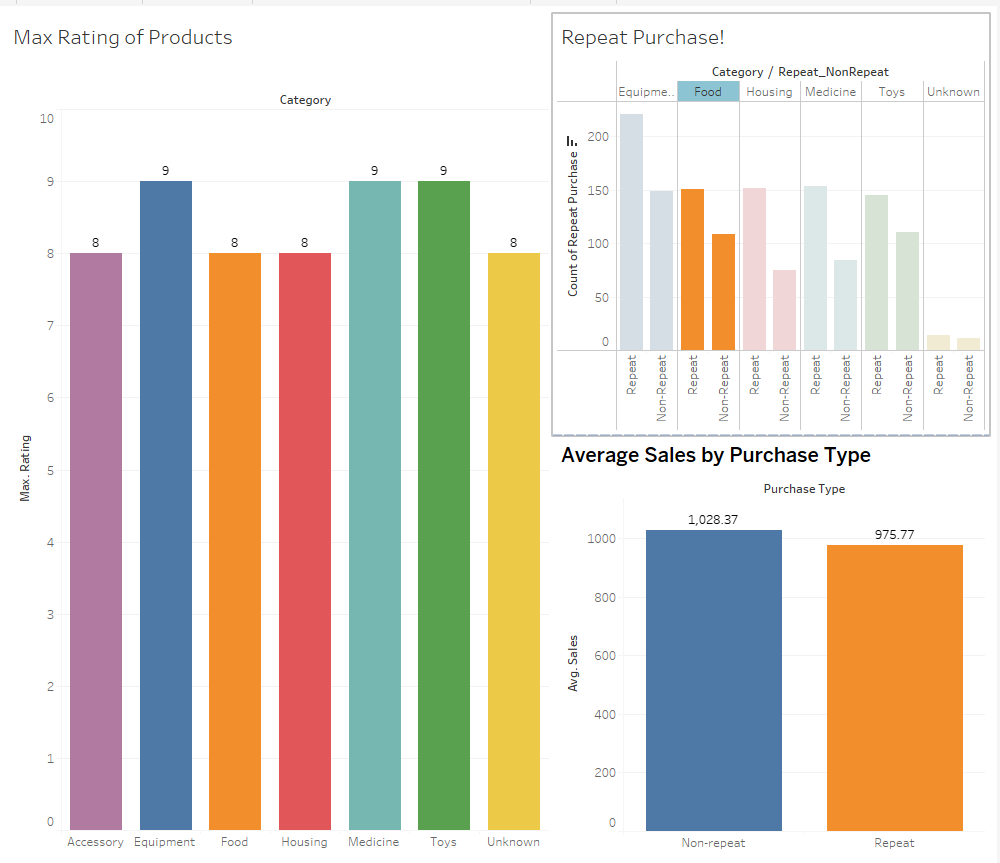

In [14]:
from IPython.display import Image, display #IPython Library used in Pyhton scripts to display Graphics
img_path = '/kaggle/input/tableaugraph1/Tableau.png'
# Display the image in the code output
display(Image(filename=img_path))